In [1]:
import pandas as pd
import matplotlib as plt

In [10]:
df_gen_eval = pd.read_excel("generative_evals.xlsx")
df_retriv_eval = pd.read_excel("retriever_evals.xlsx")

In [14]:
df_gen_eval.head()

,model,question,ground_truth,response,user_input,retrieved_contexts,reference,faithfulness,context_precision,context_recall,answer_relevancy
0,llama-3,When was the SPIL Corporate HR Policies handbo...,"August 21, 2020",The SPIL Corporate HR Policies handbook was ef...,When was the SPIL Corporate HR Policies handbo...,['SPIL Corporate HR Policies \n \n \nSIRCA PA...,"August 21, 2020",1.0,1.0,1.0,0.993743
1,llama-3,Who are the co-founders of Sirca Paints India ...,Mr. Sanjay Agarwal and Mr. Gurjit Singh Bains,The co-founders of Sirca Paints India Limited ...,Who are the co-founders of Sirca Paints India ...,['SPIL is a company engaged in marketing and t...,Mr. Sanjay Agarwal and Mr. Gurjit Singh Bains,1.0,1.0,1.0,1.000000
2,llama-3,"What does the acronym ""RESPECT"" stand for in t...","R: Reliability, E: Excellence, S: Service, P: ...","The acronym ""RESPECT"" in the company's Sales V...","What does the acronym ""RESPECT"" stand for in t...",['P : People Serve People with Fairness & Fi...,"R: Reliability, E: Excellence, S: Service, P: ...",1.0,1.0,1.0,0.998292
3,llama-3,What is the main purpose of a probation period...,The main purpose of the probation period is to...,The main purpose of the probation period is to...,What is the main purpose of a probation period...,['Training Feedback \na) After the training s...,The main purpose of the probation period is to...,1.0,1.0,1.0,0.952712
4,llama-3,What are the flexible working hour options ava...,9:30 AM to 6:00 PM or 10:00 AM to 6:30 PM,The flexible working hour options available to...,What are the flexible working hour options ava...,['HR Department for record purpose. \nFlexi W...,9:30 AM to 6:00 PM or 10:00 AM to 6:30 PM,1.0,1.0,1.0,1.000000


In [ ]:
ragas_metrics = ["faithfulness", "context_precision", "context_recall", "answer_relevancy"]
model_means = df_gen_eval.groupby("model")[ragas_metrics].mean()

model_means

,faithfulness,context_precision,context_recall,answer_relevancy
model,,,,
gemini-2.5-flash,1.000000,0.983333,1.00,0.969247
gemma-3,0.950000,0.966667,1.00,0.973428
gpt-4o,1.000000,1.000000,1.00,0.944305
llama-3,0.992857,0.975000,0.96,0.966230
llama-4,0.988312,0.983333,1.00,0.939271


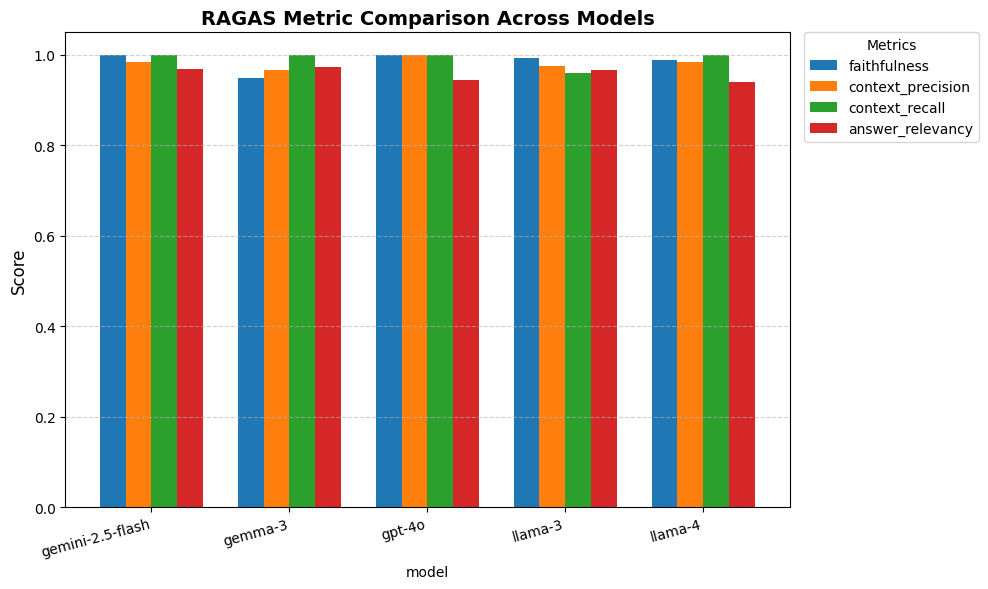

In [ ]:
import matplotlib.pyplot as plt

ax = model_means.plot(kind='bar', figsize=(10, 6), width=0.75)

plt.title("RAGAS Metric Comparison Across Models", fontsize=14, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=15, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(title="Metrics", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()